In [324]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None)

## Import the data from a website :

For each question below please have the output showing that the command worked. This will help our TA grade your homeworks faster which I am sure that he will appreciate.

Note : loading the data take a little while, so don't panic ;)

In [325]:
# URL containing the data
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

# Read in the csv file from a website
df_retail = pd.read_csv(url, encoding = 'latin1')

# Show the first 5 entries of the dataframe
df_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [326]:
#Checking the dimensions of our data
df_retail.shape

(541909, 8)

### 1) Change the column InvoiceNo to OrderNo and make it the indices for the dataframe. Drop the column InvoiceDate

In [327]:
#Change column InvoiceNo to OrderNo
df_retail.rename(columns={'InvoiceNo':'OrderNo'}, inplace=True)
df_retail.head(1)

OrderNo StockCode                         Description  Quantity  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom

### 2) Find the average amount people spent per country regardless of item, the average number of items sold per country and the total number of each item ordered.

In [346]:
#Average amount spent across all items
df_retail['Amount_Spent'] = df_retail['UnitPrice']*df_retail['Quantity']

# Average amount People Spent pert OrderNo By Country
pd.DataFrame(df_retail.groupby('Country')['Amount_Spent'].mean().sort_values())


Amount_Spent
Country                           
Unspecified              10.930615
Saudi Arabia             16.213333
RSA                      17.584386
USA                      20.002179
Belgium                  20.283772
United Kingdom           20.635460
European Community       21.670833
Cyprus                   22.134169
Poland                   22.226212
Portugal                 22.872702
Italy                    23.064960
Iceland                  23.681319
Malta                    24.335625
Canada                   24.425867
Spain                    24.789497
France                   25.066199
Germany                  25.344949
Austria                  25.624824
Channel Islands          27.340160
United Arab Emirates     27.974706
Israel                   29.225951
Switzerland              30.659397
Bahrain                  32.258824
Greece                   32.831172
Finland                  32.913985
Czech Republic           33.069600
Norway                   33.819046
Brazil                   35.737500
EIRE                     36.747610
Lebanon                  37.641778
Lithuania                47.458857
Denmark                  49.882474
Sweden                   85.096075
Singapore                95.852658
Japan                   116.561900
Australia               117.192310
Netherlands             121.003111

In [329]:
# Average amount spent on all orderNo's
df_retail['Amount_Spent'].mean()

17.987794877005495

In [347]:
#Average number of items sold per country
pd.DataFrame(df_retail.groupby('Country')['Quantity'].mean().sort_values())
#Commit

Quantity
Country                        
RSA                    6.157895
Unspecified            7.331967
European Community     8.316667
Lebanon                8.577778
Malta                  8.660714
Saudi Arabia           8.888889
Cyprus                10.359935
Italy                 10.701847
Greece                10.737931
Portugal              11.027360
Brazil                11.125000
Poland                11.163636
Spain                 11.247987
Belgium               11.441162
United Kingdom        11.923754
Austria               12.263819
Channel Islands       12.688503
Germany               13.092379
France                13.324898
Iceland               13.505495
USA                   13.731844
United Arab Emirates  14.441176
Bahrain               15.294118
Finland               15.626277
Israel                16.186235
Switzerland           16.340033
Norway                17.949486
Canada                18.253333
Lithuania             18.628571
EIRE                  19.302699
Denmark               21.671053
Singapore             23.608108
Czech Republic        26.840000
Australia             70.982234
Sweden                80.006652
Japan                 81.046729
Netherlands           84.934718

In [352]:
#Total number of each item sold worldwide by country
df_retail.groupby(['Country', 'StockCode'])['Quantity'].sum().sort_values()


Country               StockCode   
Cyprus                22754               1
United Kingdom        90011A              1
France                21026               1
                      21027               1
Belgium               22509               1
France                21030               1
Cyprus                22384               1
                      22375               1
                      22374               1
                      22372               1
                      22371               1
France                21069               1
Cyprus                22308               1
Spain                 22795               1
Portugal              23469               1
Germany               85163A              1
                      85161               1
Cyprus                22221               1
                      22141               1
                      22142               1
Netherlands           20983               1
                      20981              

In [351]:
# The total number of items sold by a country
df_retail.groupby(['Country'])['Quantity'].sum().sort_values()

Country
Saudi Arabia                 80
Bahrain                     260
RSA                         351
Brazil                      356
Lebanon                     386
European Community          499
Lithuania                   652
Czech Republic              671
Malta                       970
United Arab Emirates        982
Greece                     1557
Unspecified                1789
USA                        2458
Iceland                    2458
Canada                     2738
Poland                     3684
Israel                     3998
Austria                    4881
Singapore                  5241
Cyprus                     6361
Italy                      8112
Denmark                    8235
Channel Islands            9491
Finland                   10704
Portugal                  16122
Norway                    19188
Belgium                   23237
Japan                     26016
Spain                     27940
Switzerland               30082
Sweden                    36083


### 3) Remove all rows that contain any missing data, have negative values in Quantity and any rows that have products that cost 10 cents or less, then find all the items that cost 25 cents or less.

In [333]:
df_retail.shape

(541909, 9)

In [334]:
#Dropping rows with missing data
df_retail.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_retail.shape

(406829, 9)

In [335]:
#Dropping rows with items costing 10 cents or less.
df_retail.drop(df_retail[df_retail['UnitPrice'] <= .10].index, inplace=True)
df_retail.shape

(406482, 9)

In [336]:
#Dropping all rows with negative quantities in Quantity column
df_retail.drop(df_retail[df_retail['Quantity'] < 0].index, inplace=True)
df_retail.shape

(397585, 9)

In [337]:
#Retrieving all the items that cost 25 cents or less. This includes StockCode that is listed for two different prices below .25
df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').sort_values('StockCode')


StockCode  UnitPrice
5452       10120       0.21
439386     10135       0.25
9211       15034       0.14
252830     16008       0.12
21342      16008       0.25
10135      16010       0.12
8594       16011       0.21
4026       16012       0.21
25327      16033       0.12
215949     16043       0.12
41422      16045       0.12
135118     16048       0.12
200353     16049       0.12
213879     16052       0.19
220440     16054       0.12
26386      16216       0.16
170398     16216       0.12
170400     16218       0.12
25921      16218       0.16
33523      16219       0.21
170399     16219       0.16
3776       16235       0.21
98092      16235       0.16
23526      16236       0.21
273600     16236       0.16
473        16237       0.21
4458       16237       0.16
512        16238       0.21
273602     16238       0.16
520014    16258A       0.19
122297     16259       0.21
121135     17003       0.25
2391       17003       0.21
9745       17003       0.16
730        17021       0.24
77471     17084A       0.21
14821     17084J       0.21
21559     17084N       0.21
403797    17084N       0.16
21560     17084P       0.21
30275     17084R       0.21
6365      17084R       0.16
45132      17096       0.21
25920      17096       0.17
78577     17136A       0.21
11417      18007       0.18
513        20668       0.12
212183     20996       0.19
143380     21084       0.19
144923     21087       0.19
143437     21088       0.19
144924     21089       0.19
460034     21135       0.20
10141      21167       0.21
531827     21292       0.19
216742     21386       0.19
130186     21400       0.12
119414     21401       0.12
118149     21402       0.12
118148     21403       0.12
525722     21441       0.19
526928     21442       0.19
30252      21650       0.19
159825     21829       0.18
7943       21829       0.21
27432      21879       0.19
27431      21880       0.19
33914      21881       0.19
27430      21882       0.19
27444      21883       0.19
29509      21884       0.19
125282     21967       0.25
80978      21980       0.25
113120     21981       0.21
108045     21981       0.25
86502      21981       0.22
145811     21982       0.20
170992     21982       0.25
86503      21982       0.22
81011      21984       0.25
86505      21985       0.22
170993     21985       0.25
288330     21986       0.25
86504      21986       0.22
361793     22043       0.19
363671     22044       0.19
360192     22049       0.19
215941     22161       0.19
33379      22263       0.19
31497      22264       0.19
216735     22266       0.19
222631     22268       0.19
527022     22319       0.19
355309     22336       0.19
358569     22338       0.19
358686     22339       0.19
522802     22343       0.19
27441      22343       0.21
522804     22344       0.19
27440      22344       0.21
522803     22345       0.19
27439      22345       0.21
27438      22346       0.21
522805     22346       0.19
523172     22422       0.12
525735     22538       0.19
525737     22539       0.19
526556     22540       0.19
526559     22541       0.19
526555     22543       0.19
525739     22544       0.19
520264     22545       0.19
520258     22546       0.19
520257     22547       0.19
29849      22608       0.21
213951     22608       0.19
215879     22609       0.19
29848      22609       0.21
28569      22610       0.21
213881     22610       0.19
108039     22615       0.25
113121     22616       0.21
145812     22616       0.20
86501      22616       0.22
40060      22616       0.25
439377     22753       0.20
520759     22753       0.21
523322     22754       0.21
439379     22754       0.20
439378     22755       0.20
520443     22755       0.21
522112     22915       0.19
3103      35271S       0.19
33972     35607A       0.19
110543    35607B       0.19
353289     35954       0.19
31784      35957       0.19
432855     35968       0.20
224408    37462E       0.19
46809      40016       0.25
81642      44234       0.18
20308      44234       0.21
128

In [338]:
# Note that there are certain items that appear twice. Because the StockeCode Sold at two different Unit prices. Below is a list of all the stock codes you can purchase for under 25 cents
unique_StockCode = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
unique_StockCode[~unique_StockCode.duplicated('StockCode')].sort_values('StockCode')

StockCode  UnitPrice
5452       10120       0.21
439386     10135       0.25
9211       15034       0.14
21342      16008       0.25
10135      16010       0.12
8594       16011       0.21
4026       16012       0.21
25327      16033       0.12
215949     16043       0.12
41422      16045       0.12
135118     16048       0.12
200353     16049       0.12
213879     16052       0.19
220440     16054       0.12
26386      16216       0.16
25921      16218       0.16
33523      16219       0.21
3776       16235       0.21
23526      16236       0.21
473        16237       0.21
512        16238       0.21
520014    16258A       0.19
122297     16259       0.21
2391       17003       0.21
730        17021       0.24
77471     17084A       0.21
14821     17084J       0.21
21559     17084N       0.21
21560     17084P       0.21
6365      17084R       0.16
25920      17096       0.17
78577     17136A       0.21
11417      18007       0.18
513        20668       0.12
212183     20996       0.19
143380     21084       0.19
144923     21087       0.19
143437     21088       0.19
144924     21089       0.19
460034     21135       0.20
10141      21167       0.21
531827     21292       0.19
216742     21386       0.19
130186     21400       0.12
119414     21401       0.12
118149     21402       0.12
118148     21403       0.12
525722     21441       0.19
526928     21442       0.19
30252      21650       0.19
7943       21829       0.21
27432      21879       0.19
27431      21880       0.19
33914      21881       0.19
27430      21882       0.19
27444      21883       0.19
29509      21884       0.19
125282     21967       0.25
80978      21980       0.25
86502      21981       0.22
86503      21982       0.22
81011      21984       0.25
86505      21985       0.22
86504      21986       0.22
361793     22043       0.19
363671     22044       0.19
360192     22049       0.19
215941     22161       0.19
33379      22263       0.19
31497      22264       0.19
216735     22266       0.19
222631     22268       0.19
527022     22319       0.19
355309     22336       0.19
358569     22338       0.19
358686     22339       0.19
27441      22343       0.21
27440      22344       0.21
27439      22345       0.21
27438      22346       0.21
523172     22422       0.12
525735     22538       0.19
525737     22539       0.19
526556     22540       0.19
526559     22541       0.19
526555     22543       0.19
525739     22544       0.19
520264     22545       0.19
520258     22546       0.19
520257     22547       0.19
29849      22608       0.21
29848      22609       0.21
28569      22610       0.21
108039     22615       0.25
40060      22616       0.25
439377     22753       0.20
439379     22754       0.20
439378     22755       0.20
522112     22915       0.19
3103      35271S       0.19
33972     35607A       0.19
110543    35607B       0.19
353289     35954       0.19
31784      35957       0.19
432855     35968       0.20
224408    37462E       0.19
46809      40016       0.25
20308      44234       0.21
12890     46115B       0.19
143754    47013A       0.12
143753    47013C       0.12
18000      47420       0.19
129239    47518F       0.12
439380    51014A       0.20
439381    51014L       0.20
167728    72024U       0.21
170365    72225C       0.21
5045       72232       0.19
115186    79063C       0.19
93515     79063D       0.18
91904      79406       0.22
249672    81952B       0.19
249673    81952V       0.19
261919    81953B       0.19
261933    81953P       0.19
4945       84077       0.18
39406      84199       0.21
308679    84201B       0.19
315011    84201C       0.19
308678    84206A       0.19
483388    84206B       0.19
209324    84206C       0.19
48088     84251B       0.19
48545     84251C       0.19
48089     84251G       0.19
524048    84510E       0.21
83015      84568       0.21
83016      84598       0.21
29140      84821       0.21
29521      84826       0.21
30537      84827       0.19
252064     84929       0.19
130

In [339]:
# Displaying all of the StockCodes that are sold for different Prices
Duplicate_StockCode_2_Price = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
Duplicate_StockCode_2_Price[Duplicate_StockCode_2_Price.duplicated('StockCode',keep=False)].sort_values(['StockCode','UnitPrice'])

StockCode  UnitPrice
252830     16008       0.12
21342      16008       0.25
170398     16216       0.12
26386      16216       0.16
170400     16218       0.12
25921      16218       0.16
170399     16219       0.16
33523      16219       0.21
98092      16235       0.16
3776       16235       0.21
273600     16236       0.16
23526      16236       0.21
4458       16237       0.16
473        16237       0.21
273602     16238       0.16
512        16238       0.21
9745       17003       0.16
2391       17003       0.21
121135     17003       0.25
403797    17084N       0.16
21559     17084N       0.21
6365      17084R       0.16
30275     17084R       0.21
25920      17096       0.17
45132      17096       0.21
159825     21829       0.18
7943       21829       0.21
113120     21981       0.21
86502      21981       0.22
108045     21981       0.25
145811     21982       0.20
86503      21982       0.22
170992     21982       0.25
86505      21985       0.22
170993     21985       0.25
86504      21986       0.22
288330     21986       0.25
522802     22343       0.19
27441      22343       0.21
522804     22344       0.19
27440      22344       0.21
522803     22345       0.19
27439      22345       0.21
522805     22346       0.19
27438      22346       0.21
213951     22608       0.19
29849      22608       0.21
215879     22609       0.19
29848      22609       0.21
213881     22610       0.19
28569      22610       0.21
145812     22616       0.20
113121     22616       0.21
86501      22616       0.22
40060      22616       0.25
439377     22753       0.20
520759     22753       0.21
439379     22754       0.20
523322     22754       0.21
439378     22755       0.20
520443     22755       0.21
81642      44234       0.18
20308      44234       0.21
174093    79063C       0.18
115186    79063C       0.19
93515     79063D       0.18
126058    79063D       0.19
4945       84077       0.18
5047       84077       0.21
139503     84568       0.17
83015      84568       0.21
530597     84821       0.19
29140      84821       0.21
534111     84826       0.19
29521      84826       0.21
397589         M       0.12
12423          M       0.19
42421          M       0.20
29090          M       0.21
437235         M       0.25

### 4) Create two dataframes, one with the data of the United Kingdom and another with the data for France. Then merge the two using the StockCode column and add the suffixes '_UK' to the data from the UK and '_FR' to the data from France

### Please comment on the number of rows that the result has compared to the number of rows the data originally had. Why did the number of rows increase ? What needs to be changed ?
There are a ton more rows on the merged data set because the dtwo data frames have duplicate values for StockCode. The Data was comprised on an OderNo Bases.
To change this we would look at the data from a completely different take. Maybe a list of the Stock codes in either country? I don't know why you would want to merge these two
data sets together like this. It doesn't really make analytical sense.

In [340]:
#Create dataframe with the data from UK
df_UK = df_retail[df_retail['Country'] == 'United Kingdom'].copy()
df_UK.head(10)

OrderNo StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5  536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6  536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7  536366     22633               HAND WARMER UNION JACK         6   
8  536366     22632            HAND WARMER RED POLKA DOT         6   
9  536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

    InvoiceDate  UnitPrice  CustomerID         Country  Amount_Spent  
0  12/1/10 8:26       2.55     17850.0  United Kingdom         15.30  
1  12/1/10 8:26       3.39     17850.0  United Kingdom         20.34  
2  12/1/10 8:26       2.75     17850.0  United Kingdom         22.00  
3  12/1/10 8:26       3.39     17850.0  United Kingdom         20.34  
4  12/1/10 8:26       3.39     17850.0  United Kingdom         20.34  
5  12/1/10 8:26       7.65     17850.0  United Kingdom         15.30  
6  12/1/10 8:26       4.25     17850.0  United Kingdom         25.50  
7  12/1/10 8:28       1.85     17850.0  United Kingdom         11.10  
8  12/1/10 8:28       1.85     17850.0  United Kingdom         11.10  
9  12/1/10 8:34       1.69     13047.0  United Kingdom         54.08

In [341]:

#Create dataframe with the data from France
df_FR = df_retail[df_retail['Country'] == 'France'].copy()
df_FR.head(10)

OrderNo StockCode                          Description  Quantity  \
26  536370     22728            ALARM CLOCK BAKELIKE PINK        24   
27  536370     22727            ALARM CLOCK BAKELIKE RED         24   
28  536370     22726           ALARM CLOCK BAKELIKE GREEN        12   
29  536370     21724      PANDA AND BUNNIES STICKER SHEET        12   
30  536370     21883                     STARS GIFT TAPE         24   
31  536370     10002          INFLATABLE POLITICAL GLOBE         48   
32  536370     21791   VINTAGE HEADS AND TAILS CARD GAME         24   
33  536370     21035      SET/2 RED RETROSPOT TEA TOWELS         18   
34  536370     22326  ROUND SNACK BOXES SET OF4 WOODLAND         24   
35  536370     22629                  SPACEBOY LUNCH BOX         24   

     InvoiceDate  UnitPrice  CustomerID Country  Amount_Spent  
26  12/1/10 8:45       3.75     12583.0  France          90.0  
27  12/1/10 8:45       3.75     12583.0  France          90.0  
28  12/1/10 8:45       3.75     12583.0  France          45.0  
29  12/1/10 8:45       0.85     12583.0  France          10.2  
30  12/1/10 8:45       0.65     12583.0  France          15.6  
31  12/1/10 8:45       0.85     12583.0  France          40.8  
32  12/1/10 8:45       1.25     12583.0  France          30.0  
33  12/1/10 8:45       2.95     12583.0  France          53.1  
34  12/1/10 8:45       2.95     12583.0  France          70.8  
35  12/1/10 8:45       1.95     12583.0  France          46.8

In [342]:
#Merge both dataframes using StockCode to match the data
UK_FR = pd.merge(df_UK, df_FR, left_on='StockCode', right_on='StockCode', suffixes=('_UK', "_FR"), copy=True)
print("DF_Retail Shape:", df_retail.shape)
print("UK Merged with FR Shape:", UK_FR.shape)

DF_Retail Shape: (397585, 9)
UK Merged with FR Shape: (2434624, 17)


### 5) Create 3 labels : low, medium, shop-a-holic for each country based on the total number of good purchased.

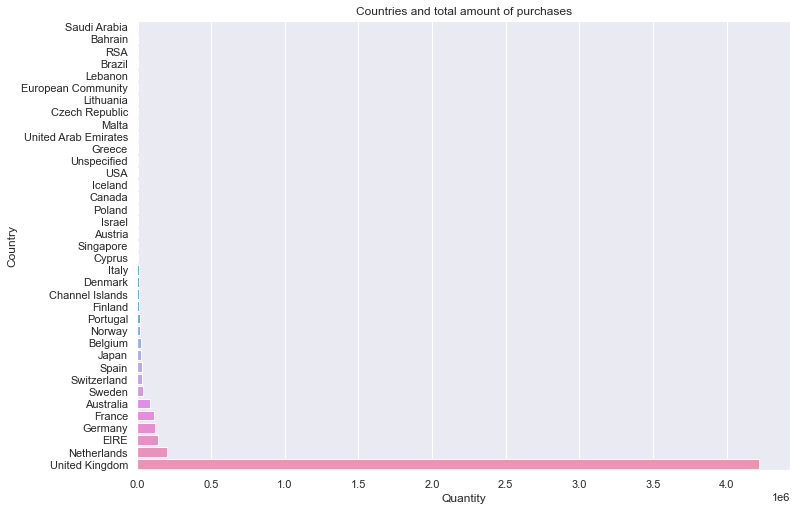

In [343]:
# First to see what we want our bins to look like we need to see what the total purchase are for each country
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
country_Purchases = df_retail.groupby(['Country']).sum()['Quantity'].sort_values().reset_index().copy()
sns.barplot(data=country_Purchases, y='Country', x='Quantity')
plt.title("Countries and total amount of purchases")
plt.show()

In [344]:
# It's Visually easy to see how we should assign the bins base on the total number of purchased goods now.
country_Purchases['Shopping Bin'] = np.where(country_Purchases['Quantity'] < 10000, "Low", 
                                                                np.where(country_Purchases['Quantity'] < 1000000, "Medium","Shop-a-holic"))
country_Purchases

# Labels

Country  Quantity  Shopping Bin
0           Saudi Arabia        80           Low
1                Bahrain       260           Low
2                    RSA       351           Low
3                 Brazil       356           Low
4                Lebanon       386           Low
5     European Community       499           Low
6              Lithuania       652           Low
7         Czech Republic       671           Low
8                  Malta       970           Low
9   United Arab Emirates       982           Low
10                Greece      1557           Low
11           Unspecified      1789           Low
12                   USA      2458           Low
13               Iceland      2458           Low
14                Canada      2738           Low
15                Poland      3684           Low
16                Israel      3998           Low
17               Austria      4881           Low
18             Singapore      5241           Low
19                Cyprus      6361           Low
20                 Italy      8112           Low
21               Denmark      8235           Low
22       Channel Islands      9491           Low
23               Finland     10704        Medium
24              Portugal     16122        Medium
25                Norway     19188        Medium
26               Belgium     23237        Medium
27                 Japan     26016        Medium
28                 Spain     27940        Medium
29           Switzerland     30082        Medium
30                Sweden     36083        Medium
31             Australia     83901        Medium
32                France    111103        Medium
33               Germany    118198        Medium
34                  EIRE    139462        Medium
35           Netherlands    200361        Medium
36        United Kingdom   4221629  Shop-a-holic

### 6) Create a pivot table for the data.

### The table should provide the total number of products ordered for each product and every country. In other words, each product should have the associated coutries where that product was ordered and have the total number of that product that was ordered for each country.

In [345]:
df_retail.groupby(['StockCode', 'Country'])['Quantity'].sum().to_frame()

Quantity
StockCode    Country                       
10002        EIRE                        12
             France                     372
             Germany                      1
             Japan                        1
             Spain                       24
             Switzerland                 12
             United Kingdom             401
10080        United Kingdom             291
10120        France                      10
             United Kingdom             183
10123C       United Kingdom               5
10124A       United Kingdom              16
10124G       United Kingdom              17
10125        France                     470
             Germany                    120
             Switzerland                 20
             United Kingdom             616
10133        Canada                      40
             EIRE                        40
             Israel                      20
             Portugal                    20
             Switzerland                 10
             United Kingdom            2254
10135        Canada                      20
             EIRE                        60
             France                      10
             Germany                    200
             Norway                      10
             United Kingdom            1638
11001        EIRE                        48
             France                      16
             Germany                     32
             Norway                      16
             Portugal                    16
             Spain                       16
             United Kingdom            1108
15030        United Kingdom             143
15034        Germany                     24
             Greece                      24
             Norway                     120
             Spain                       24
             United Kingdom            3347
15036        Australia                  600
             Denmark                     12
             EIRE                        48
             France                      60
             Germany                   1164
             Italy                       12
             Netherlands                 12
             Norway                      48
             Sweden                     804
             United Kingdom           19116
15039        Belgium                     10
             France                      10
             Germany                      1
             United Kingdom            1538
15044A       Canada                       6
             Germany                     30
             United Kingdom             392
15044B       Germany                     12
             Spain                        6
             United Kingdom             289
15044C       Canada                       6
             France                       6
             United Kingdom             260
15044D       Canada                       6
             EIRE                         6
             Germany                     18
             Spain                        6
             United Kingdom             594
15056BL      Australia                    3
             Austria                     36
             Belgium                     12
             Brazil                       3
             EIRE                        75
             Finland                      3
             France                     111
             Germany                    195
             Lithuania                   12
             Norway                       9
             Poland                      12
             Switzerland                 12
             United Kingdom            2296
15056N       Austria                     36
             Brazil                       3
             Cyprus                      66
             EIRE                       101
             Finland                      3
             France                      51
             Germany           

Congratulations ! You made it to the end of the file. Your reward is a joke:

Q: What do you call a boomerang that doesn’t work?












































A: A stick.